In [12]:
import os
import pandas as pd
from skimage.io import imread
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import cv2
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
def _grayScale(img):
    if len(img.shape) == 3 and img.shape[2] == 3:
        return rgb2gray(img)
    return img

In [3]:
def _importData():
    global df
    img_array = []
    img_outcome = []
    categories = ['cats', 'dogs']
    folder = 'images/'
    for i in categories:
        path = os.path.join(folder, i)
        for pic in os.listdir(path):
            # img = imread(os.path.join(path, pic))
            # img_gray = _grayScale(img)
            img_binary = cv2.threshold(cv2.imread(os.path.join(path, pic), 0), 127, 255, cv2.THRESH_BINARY)[1]
            img_resize = resize(img_binary, (150,150))
            img_array.append(img_resize.flatten())
            # Outcome: cat:0 dog:1
            img_outcome.append(categories.index(i))
    df = pd.DataFrame(img_array)
    df['Outcome'] = img_outcome
_importData()

In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
def _createModel():
    global model
    model = SVC()
_createModel()

In [6]:
def _fit():
    model.fit(x, y)
_fit()

In [7]:
def _importTestData():
    global df_test
    img_test_array = []
    img_test_outcome = []
    categories = ['cats', 'dogs']
    folder = 'images/test_set'
    for i in categories:
        path = os.path.join(folder, i)
        for pic in os.listdir(path):
            # img_test = imread(os.path.join(path, pic))
            # img_test_gray = _grayScale(img_test)
            img_test_binary = cv2.threshold(cv2.imread(os.path.join(path, pic), 0), 127, 255, cv2.THRESH_BINARY)[1]
            img_test_resize = resize(img_test_binary, (150,150))
            img_test_array.append(img_test_resize.flatten())
            # Outcome: cat:0 dog:1
            img_test_outcome.append(categories.index(i))
    df_test = pd.DataFrame(img_test_array)
    df_test['Outcome'] = img_test_outcome
_importTestData()

In [8]:
x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [9]:
def _predict():
    global y_pred
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))
_predict()

              precision    recall  f1-score   support

         cat       0.67      0.50      0.57        20
         dog       0.60      0.75      0.67        20

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.63      0.62      0.62        40



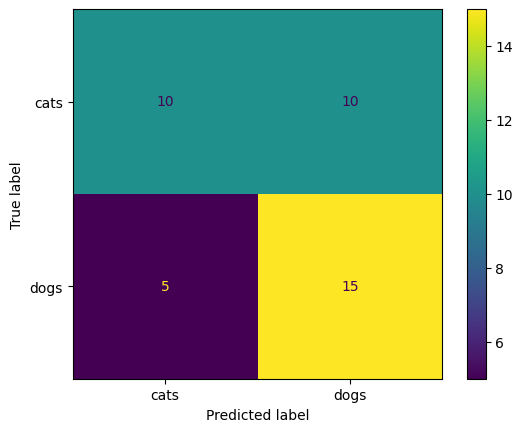

In [10]:
def _cm():
    global cm
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cats', 'dogs'])
    disp.plot()
_cm()

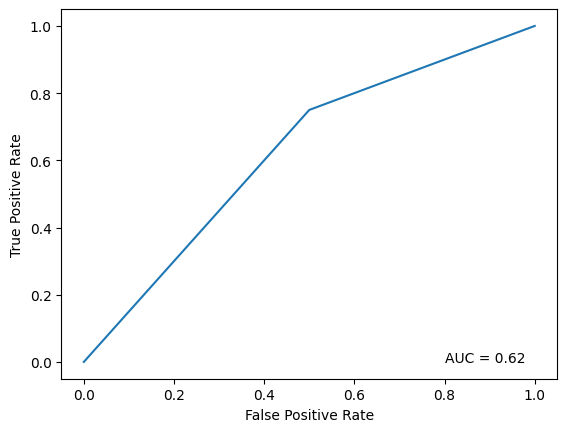

In [26]:
def _auc_score():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.8, 0, 'AUC = {:.2f}'.format(auc_score))
    plt.show()
_auc_score()